## Resignation in Australian Civil Service
Employee retention has many benefits. It can help with efficiency, customer satisfaction, and workplace diversity. Understanding why people choose to resign is key in building a stable group.
<br>This paper looks at the Australian Department of Education, Training, and Employment (DETE) as well as the Technical and Further Education (TAFE) institute in Queensland, Australia. It compares rates of resignation to the length of employment and to the age of employee.

In [1]:
# import necessary libraries and set display options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# open files
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [2]:
# dete_survey
display(dete_survey.head())
display(dete_survey.info())

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,"1,984.0000","2,004.0000",Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,"2,011.0000","2,011.0000",Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,"2,005.0000","2,006.0000",Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,"1,970.0000","1,989.0000",Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

None

In [3]:
# tafe_survey
display(tafe_survey.head())
display(tafe_survey.info())

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

None

## Initial Look & Header Standardization
There are many columns in both files that are not needed to answer the research questions. Making the header style more uniform allows for code that is easier to read.

In [4]:
# drop unnecessary columns
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# modify & standardize header
map = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype',
       'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age',
       'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=map)
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()
tafe_survey_updated.columns = tafe_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()

display(dete_survey_updated.columns.to_list())
display(tafe_survey_updated.columns.to_list())

['id',
 'separationtype',
 'cease_date',
 'dete_start_date',
 'role_start_date',
 'position',
 'classification',
 'region',
 'business_unit',
 'employment_status',
 'career_move_to_public_sector',
 'career_move_to_private_sector',
 'interpersonal_conflicts',
 'job_dissatisfaction',
 'dissatisfaction_with_the_department',
 'physical_work_environment',
 'lack_of_recognition',
 'lack_of_job_security',
 'work_location',
 'employment_conditions',
 'maternity/family',
 'relocation',
 'study/travel',
 'ill_health',
 'traumatic_incident',
 'work_life_balance',
 'workload',
 'none_of_the_above',
 'gender',
 'age',
 'aboriginal',
 'torres_strait',
 'south_sea',
 'disability',
 'nesb']

['id',
 'institute',
 'workarea',
 'cease_date',
 'separationtype',
 'contributing_factors._career_move_-_public_sector_',
 'contributing_factors._career_move_-_private_sector_',
 'contributing_factors._career_move_-_self-employment',
 'contributing_factors._ill_health',
 'contributing_factors._maternity/family',
 'contributing_factors._dissatisfaction',
 'contributing_factors._job_dissatisfaction',
 'contributing_factors._interpersonal_conflict',
 'contributing_factors._study',
 'contributing_factors._travel',
 'contributing_factors._other',
 'contributing_factors._none',
 'gender',
 'age',
 'employment_status',
 'position',
 'institute_service',
 'role_service']

## Filtering Year Columns
The code cell below shows the responses in the ```separationtype``` column. This study is focused only on resignations. The DETE survey has multiple resignation codes. All of these rows, plus the corresponding rows in the tafe survey, will be copied to new data frames. This reduces 822 DETE rows and 702 TAFE rows to 262 and 340 respectively. from  The relevant values will be cleaned and the rows checked to see if they are corrupted by any outlier values.

In [5]:
# values coded into speparationtype column
display(dete_survey_updated["separationtype"].value_counts(dropna=False))
display(tafe_survey_updated["separationtype"].value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [6]:
# copy separationtype rows using regex and vectorized string methods
pattern = r"Resignation"
dete_resignations = dete_survey_updated[dete_survey_updated["separationtype"].str.contains(pattern, regex=True)].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"].str.contains(pattern, regex=True, na=False)].copy()

display(dete_resignations["separationtype"].value_counts(dropna=False))
display(tafe_resignations["separationtype"].value_counts(dropna=False))

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Resignation    340
Name: separationtype, dtype: int64

In [7]:
# dete_start_date > 1940
dete_resignations = dete_resignations[1940 < dete_resignations["dete_start_date"]]

# dete_start_date < role_start_date < cease_date
dete_resignations = dete_resignations[1940 < dete_resignations["role_start_date"]]
dete_resignations = dete_resignations[dete_resignations["role_start_date"] < 2021]

# cease_date < current date
pattern = r"[0-9][0-9]/"
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.replace(pattern, "", regex=True).astype(float)
dete_resignations = dete_resignations[dete_resignations["cease_date"] < 2021]

<AxesSubplot:>

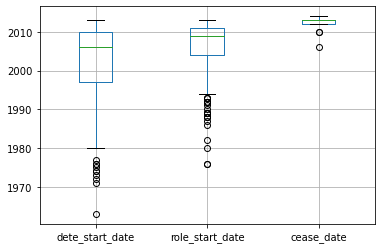

In [8]:
dete_resignations.boxplot(column=["dete_start_date", "role_start_date", "cease_date"])

## Filtering Year Columns Continued
The DETE dataframe had one row in the `role_start_date` column with a year entry of 200. This row was excluded. There are a number of rows with NaN, but they can stay in because Pandas vectorized methods accommodate them. The first question is to assess connections between resignation and newer employees. The TAFE dataframe includes a employment duration column. A similar column needs to created for the DETE information. 

In [9]:
# display TAFE institute service
display(tafe_resignations["institute_service"].value_counts())
display(tafe_resignations["institute_service"].describe())

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

count                  290
unique                   7
top       Less than 1 year
freq                    73
Name: institute_service, dtype: object

In [10]:
# create and display DETE institute service column
# the dictionary reassigns discrete numbers into a more useable range
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
di = {0.0: "Less than 1 year", 1.0: "1-2", 2.0:"1-2", 3.0:"3-4", 4.0:"3-4", 5.0:"5-6", 6.0:"5-6", 7.0:"7-10",
      8.0:"7-10", 9.0:"7-10", 10.0:"7-10", 11.0:"11-20", 12.0:"11-20", 13.0:"11-20", 14.0:"11-20", 15.0:"11-20",
      16.0:"11-20", 17.0:"11-20", 18.0:"11-20", 19.0:"11-20", 20.0:"11-20", 21:"More than 20 years",
      22:"More than 20 years", 23:"More than 20 years", 24:"More than 20 years", 25:"More than 20 years",
      26:"More than 20 years", 27:"More than 20 years", 28:"More than 20 years", 29:"More than 20 years",
      30:"More than 20 years", 31:"More than 20 years", 32:"More than 20 years", 33:"More than 20 years",
      34:"More than 20 years", 35:"More than 20 years", 36:"More than 20 years", 38:"More than 20 years",
      39:"More than 20 years", 41:"More than 20 years", 42:"More than 20 years", 49:"More than 20 years"}
dete_resignations['institute_service'] = dete_resignations['institute_service'].map(di)

display(dete_resignations["institute_service"].value_counts())
dete_resignations["institute_service"].describe()

11-20                 52
More than 20 years    41
7-10                  39
5-6                   38
3-4                   36
1-2                   36
Less than 1 year      20
Name: institute_service, dtype: int64

count       262
unique        7
top       11-20
freq         52
Name: institute_service, dtype: object

## Aggregating Dissatisfaction
Each dataset has multiple resignation columns that could be considered as dissatisfaction, as opposed to other reasons such as `ill_health`, `study`, or `maternity`. These columns will be aggregated into a single `dissatisfied` column for each dataset. Values will be coded to True or False. At this time, the NaN values are being coded as False.

In [11]:
# inspect TAFE resignation values
display(tafe_resignations["contributing_factors._dissatisfaction"].value_counts(dropna=False))
display(tafe_resignations["contributing_factors._job_dissatisfaction"].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: contributing_factors._dissatisfaction, dtype: int64

-                      270
Job Dissatisfaction     62
NaN                      8
Name: contributing_factors._job_dissatisfaction, dtype: int64

In [12]:
# convert TAFE resignation values to boolean values
# vectorized methods are amazing
def boolean_bummer(element):
    if pd.isnull(element):
        return np.nan
    elif element == "-":
        return False
    else:
        return True

tafe_resig_factors = ["contributing_factors._dissatisfaction", "contributing_factors._job_dissatisfaction"]    
tafe_resignations[tafe_resig_factors] = tafe_resignations[tafe_resig_factors].applymap(boolean_bummer)

In [13]:
# inspect TAFE resignation values after converting to boolean
display(tafe_resignations["contributing_factors._dissatisfaction"].value_counts(dropna=False))
display(tafe_resignations["contributing_factors._job_dissatisfaction"].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: contributing_factors._dissatisfaction, dtype: int64

False    270
True      62
NaN        8
Name: contributing_factors._job_dissatisfaction, dtype: int64

In [14]:
# create new TAFE column `dissatisfied` using .any()
# trying to preserve NaN as NaN does not work, gets converted to True or False
tafe_resignations["dissatisfied"] = tafe_resignations[tafe_resig_factors].any(axis=1, skipna=True)

In [15]:
# inspect all three columns for logical errors
tafe_resignations = tafe_resignations.reindex()
display(tafe_resignations.loc[39:53,["contributing_factors._dissatisfaction", "contributing_factors._job_dissatisfaction",
                           "dissatisfied"]])

,contributing_factors._dissatisfaction,contributing_factors._job_dissatisfaction,dissatisfied
39,False,False,False
40,True,False,True
41,False,False,False
42,False,False,False
45,False,False,False
46,False,False,False
47,True,False,True
49,False,False,False
51,NaN,NaN,False
52,False,True,True


In [16]:
# create new DETE column `dissatisfied` using .any()
dete_resig_factors = ["job_dissatisfaction", "dissatisfaction_with_the_department", "physical_work_environment",
                      "lack_of_recognition", "lack_of_job_security", "work_location", "employment_conditions",
                      "work_life_balance", "workload"]

dete_resignations["dissatisfied"] = dete_resignations[dete_resig_factors].any(axis=1, skipna=True)
display(dete_resignations["dissatisfied"].value_counts())

True     132
False    130
Name: dissatisfied, dtype: int64

## Combine Datasets
Both datasets are ready to combine. Vertical concatenation will work best for the purpose of this study. Only the relevant columns will be used. They will be used to create new two new columns, one of age groups, and the other length of employment groups.

In [17]:
# make two new dataframes containing only relevant columns
dete_resignations_up = dete_resignations[["age", "institute_service", "dissatisfied"]].copy()
tafe_resignations_up = tafe_resignations[["age", "institute_service", "dissatisfied"]].copy()

# add institute column to each dataset w/ dataset label
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"

# combine dataframes vertically
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
display(combined.head())
display(combined.tail())

,age,institute_service,dissatisfied,institute
0,36-40,7-10,False,DETE
1,41-45,11-20,True,DETE
2,31-35,3-4,False,DETE
3,46-50,11-20,True,DETE
4,31-35,3-4,False,DETE


,age,institute_service,dissatisfied,institute
597,21 25,5-6,False,TAFE
598,51-55,1-2,False,TAFE
599,NaN,NaN,False,TAFE
600,51-55,5-6,False,TAFE
601,26 30,3-4,False,TAFE


In [18]:
# use institute_service to create new service_cat column
# function to reassign institute_service values
def service_changer(element):
    if element == "Less than 1 year" or element == "1-2":
        return "New"
    elif element == "3-4" or element == "5-6":
        return "Experienced"
    elif element == "7-10":
        return "Established"
    elif pd.isnull(element):
        return np.nan
    else:
        return "Veteran"
    
combined["service_cat"] = combined["institute_service"].apply(service_changer)
display(combined["institute_service"].value_counts(dropna=False))

1-2                   100
3-4                    99
Less than 1 year       93
11-20                  78
5-6                    71
7-10                   60
More than 20 years     51
NaN                    50
Name: institute_service, dtype: int64

In [19]:
# use age to create new age_groups column
alpha = r"[a-z]*"
combined["age_groups"] = combined["age"]
combined["age_groups"] = combined["age_groups"].str.replace(" ","-").str.replace(alpha, "", regex=True).str.replace("--", "-")
combined["age_groups"] = combined["age_groups"].str.replace("20-", "Under 30").str.replace("21-25", "Under 30").str.replace("26-30", "Under 30")
combined["age_groups"] = combined["age_groups"].str.replace("31-35", "31-40").str.replace("36-40", "31-40").str.replace("41-45", "41-50").str.replace("46-50", "41-50")
combined["age_groups"] = combined["age_groups"].str.replace("51-55", "51-60").str.replace("56-60", "51-60").str.replace("56-", "51-60").str.replace("61-", "Over 60")
display(combined["age_groups"].value_counts(dropna=False))

41-50       155
Under 30    131
31-40       128
51-60       119
NaN          52
Over 60      17
Name: age_groups, dtype: int64

<AxesSubplot:>

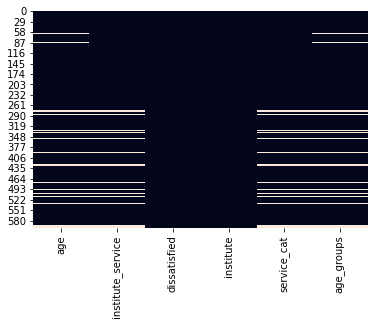

In [20]:
# heatmap showing missing values in pink
import seaborn as sns
display(sns.heatmap(combined.isnull(), cbar=False))

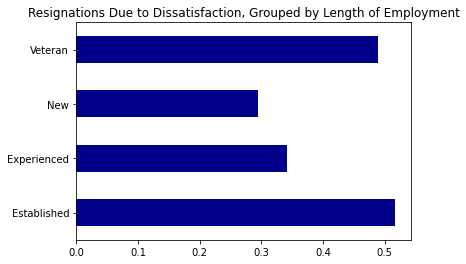

In [21]:
# bar chart showing resignation vs length of employment categories
pv_service_cat = combined.pivot_table(values="dissatisfied", index="service_cat")
ax = pv_service_cat.plot(kind="barh", legend=False, title="Resignations Due to Dissatisfaction, Grouped by Length of Employment", color="darkblue")
ax.set_ylabel("")
plt.show()

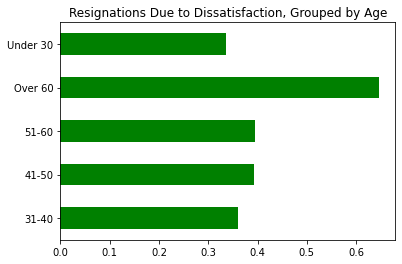

In [22]:
# bar chart showing resignation vs age categories
pv_age_groups = combined.pivot_table(values="dissatisfied", index="age_groups")
ax = pv_age_groups.plot(kind="barh", legend=False, title="Resignations Due to Dissatisfaction, Grouped by Age", color="green")
ax.set_ylabel("")
plt.show()

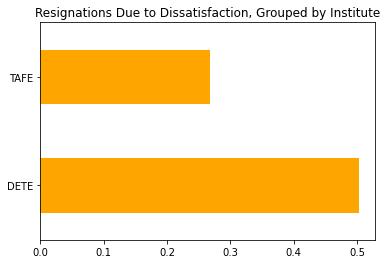

In [23]:
# bar chart showing resignation vs insitute
pv_institute = combined.pivot_table(values="dissatisfied", index="institute")
ax = pv_institute.plot(kind="barh", legend=False, title="Resignations Due to Dissatisfaction, Grouped by Institute", color="orange")
ax.set_ylabel("")
plt.show()

## Conclusions
While this is only a primary survey, it appears that both age and length of employment are correlated to resignation due to job dissatisfaction. The high rate seen in workers over the age of 60 suggests reconsidering inclusion factors. The data also show an almost double rate of resignation due to job dissatisfaction in the DETE.